In [1]:
from signal_utils import *

# Real Signal

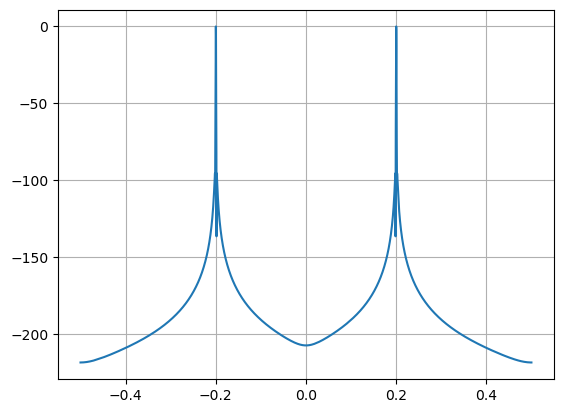

In [9]:
N = 2**12
n = np.arange(N)
F = 0.2

perc = 0.15
Fmax = 0.5 * (1 - perc)

x_test = (1 - 2**-11) * np.sin(2*np.pi*F*n)

np.savetxt("../../../../VHDL/data/delay_test/xin_test.txt", x_test, fmt="%.12f")

freqs_test, xfftdB_test, an_ = fftdB(x_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

In [8]:
k3 = np.array([0.5, 0.0, -0.5])
k5 = np.array([-1, 8, 0, -8, +1]) / 12.0
k7 = np.array([1, -9, +45, 0, -45, +9, -1]) / 60.0
k9 = np.array([-1, 12, -39, +56, 0, -56, +39, -12, +1]) / 280.0

np.savetxt("../../../../VHDL/data/delay_test/k3.txt", k3, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/k5.txt", k5, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/k7.txt", k7, fmt="%.12f")

32767
4096


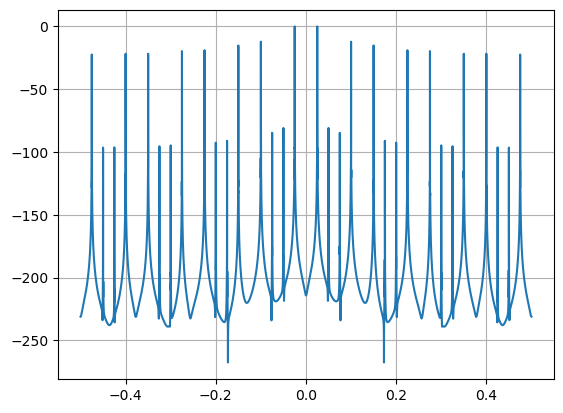

In [12]:
xout_test = np.loadtxt("../../../../VHDL/data/delay_test/xout_test.txt", dtype=np.int32)
print(len(xout_test))
print(len(x_test))

freq_test, xfftdB_test, an = fftdB(xout_test, True)
plt.figure()
plt.plot(freq_test, xfftdB_test)
plt.grid()

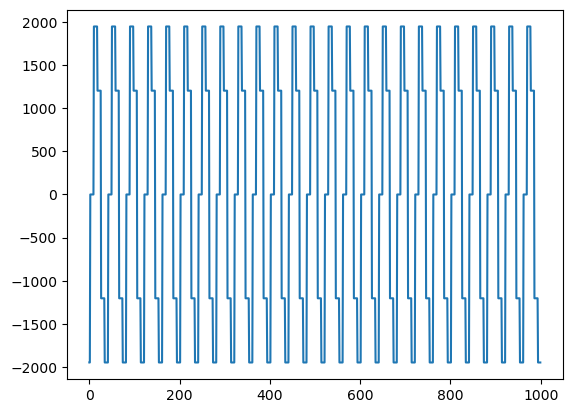

In [17]:
plt.figure()
plt.plot(xout_test[1000:2000])